Recall the 7-state model of the mammalian circadian clock published by Becker-Weimann et al. (2004). The paper investigates the relative contributions of positive and negative feedback to oscillator performance. We will be using the model presented in this paper for our final investigation. 

Your goal is to demonstrate your mastery of the topics in this course by understanding and analyzing this model. Each question relates to one topic.

## The Project

<ol>
<li> Kinetics and Motifs: Describe the kinetics used in this model. Be detailed. Be sure to include a discussion of gates (i.e. AND or OR gates). What is the basic network motif used in this model?
<li> Model Simulation: Write code to simulate the model using the published parameters. Follow the same coding conventions used for previous projects. Simulate the model and recreate Figure 3A of the paper.
    <li> Numerical Solvers: Using the <code>%timeit</code> magic code, compare the time it takes to simulate the model using RK23, RK45, DOP853, Radau, BDF, and LSODA (read the descriptions in the documentation for <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html">solve_ivp</a>). Use a relative tolerance of $10^{-8}$, the default absolute tolerance, an end ``time'' of at least 2400 hours, and no <code>t_eval</code> parameter. RK23 is a low-order explicit solver, RK45 is a high-order explicit solver, DOP853 is an even higher order explicit solver, BDF is a variable-order implicit solver, Radau is a high-order implicit solver, and LSODA is an all-purpose solver (it makes lots of adjustments while solving the problem). 
        <ol>
        <li>Do your run-times makes sense given these descriptions? Explain your answer. 
        <li>Examine how many steps the solver took (sol.t.size). How do they relate to the run times?
        <li>To answer the previous question, it is probably a good idea to re-run the timing with a relative tolerance of $10^{-3}$. This way, you can compare run-times and step counts based on tolerance.
        <li>From the relative differences in time, what can you conclude about the stiffness of the system? 
        </ol>
<li> Sensitivity Analysis: Perform a sensitivity analysis of the model. You may decide what you want to find the sensitivity to (the state trajectories, the period, the amplitude of a given state, etc.). Discuss any clear similarities or stark contrasts with the results from Leloup & Goldbeter's 2004 JTB paper.
</ol>

## Extensions

To receive a grade higher than a B+, you will want to include at least one extension. Here are a few possible extensions:

<ul>
<li> Apply the sensitivity analysis of Stelling et al (2004) to the mammalian model:
	<ul>
    	<li> Consolidate the sensitivity information using the vector 2-norm. In other words, from your three-dimensional matrix, extract the information for a given parameter, reshape it into a vector, and call Numpy's \lstinline!norm! function on it.  That gives each parameter a scalar sensitivity measure.
        <li>Rank the parameters from most to least sensitive. In keeping with the analysis of Stelling et al. the rank should be 0 for the most sensitive and 1 for the least sensitive. In other words, if parameter $i$ is the least sensitive, then its ``raw rank'' is 1 and if parameter $j$ is the most sensitive, then its raw rank is $N_p$ (where $N_p$ is the number of parameters). To convert from raw rank to rank, use
    <code>
    rank = (NP - raw_rank)/(NP-1);</code>
    <li> Can you come to the same conclusions about this model as Stelling et al. came to regarding the fly clock models?
    </ul>
<li>Solve the sensitivity ODEs. If you choose to do this, you may request instructions and the Jacobian code from Stephanie.
<li>Sample parameter space and perform sensitivity analysis at each of the new parameter sets (but only for those parameter sets that cause the system to oscillate). Compute the sensitivity rankings for each parameter set. Use them to produce a figure like Figure 2 by Stelling et al. (2004).
<li>Reproduce figures from Becker-Weimann et al (2004). Be sure to include a discussion of your approach and the meaning of the figure.
</ul>

### References

S Becker-Weimann, J Wolf, H Herzel, and A Kramer, "Modeling Feedback Loops of the Mammalian Circadian Oscillator", *Biophys. J.*, 2004

J Stelling, ED Gilles, and FJ Doyle III, "Robustness properties of circadian clock architectures", *Proc. Natl. Acad. Sci*, 2004

J-C Leloup and A Goldbeter, "Modeling the mammalian circadian clock: Sensitivity analysis and multiplicity of oscillatory mechanisms", *J. theor. Biol.*, 2004.

## Notes

To time the solvers, use the magic command %timeit. If you are running it for lots of tolerances and lots of methods, then it will probably be helpful to store the timing results in variables. The documentation about this feature of timeit is rather sparse, but I figured out how to get it to work as long as the only code in the cell is the code that calls the solver. Then, the cell immediately following it should assign the variable. e.g.

In the first cell
<code>
    %timeit -o sol = scipy.integrate.solve_ivp(fun=beckerWeimann_model, t_span=(0,10*24), y0=yinit, method='RK45', args=[params], rtol=1e-8 )
    </code>
    
and in the second cell, do the assignent from the special variable \_. Below, I show the code and then include print statements that will guide you in your understanding of that variable.
<code>
rk45_time = _    
print( rk45_time )
print( rk45_time.average )
print( rk45_time.stdev )    
</code>

Unfortunately, I am not sure how to have multiple calls in the same cell. But I think the variable is still useful  if you have a different variable name for each call, the you can put them in a list in a later cell, so that you can plot them all together.


### Model Details:
7-state model of Becker-Weimann (Becker-Weimann, Sabine, Jana Wolf, Hanspeter Herzel, and Achim Kramer. 2004. “Modeling Feedback Loops of the Mammalian Circadian Oscillator.” Biophysical Journal 87 (5): 3023–34. https://doi.org/10.1529/biophysj.104.040824.).

The parameters are
- v1b : maximal rate of Per2/Cry transcription
- k1b : activation threshold for Per2/Cry transcription
- k1i : inhibition constant of Per2/Cry transcription
- c: concentration of constituative activator
- p: Hill coefficient of inhibition of Per2/Cry transcription
- k1d: degradation rate of Per2/Cry mRNA
- k2b: complex formation rate of Per2/Cry mRNA
- q: Number of PER2/CRY complex forming subunits
- k2d: degradation rate of cytoplasmic PER2/CRY
- k2t: nuclear import rate of teh PER2/CRY complex
- k3t: nuclear export rate of teh PER2/CRY complex
- k3d: degradation rate of nuclear PER2/CRY
- v4b: maximal rate of Bmal1 transcription
- k4b : activation threshold for Bmal1 transcription
- r: Hill coefficient of activation of Bmal1 transcription
- k4d: degradation rate of Bmal1 mRNA
- k5b: translation rate of BMAL1
- k5d: degradation rate of cytoplasmic BMAL1
- k5t: nuclear import rate of BMAL1
- k6t: nuclear export rate of BMAL1
- k6d: degradation rate of nuclear BMAL1
- k6a: activation rate of nuclear BMAL1
- k7a: deactivation rate of nuclear BMAL1
- k7d: degradataion rate of nuclear BMAL1

The model is
\begin{eqnarray*}
\frac{dy1}{dt} &=& f_1 - k_{1d}\cdot y1\\
\frac{dy2}{dt} &=& k_{2b}\cdot y1^q - k_{2d}\cdot y2 - k_{2t}\cdot y2 + k_{3t}\cdot y3\\
\frac{dy3}{dt} &=& k_{2t}\cdot y2 - k_{3t}\cdot y3 - k_{3d}\cdot y3 \\
\frac{dy4}{dt} &=& f_2 - k_{4d}\cdot y4\\
\frac{dy5}{dt} &=& k_{5b}\cdot y4 - k_{5d}\cdot y5 - k_{5t}\cdot y5 + k_{6t}\cdot y6 \\
\frac{dy6}{dt} &=& k_{5t}\cdot y5 - k_{6t}\cdot y6 - k_{6d}\cdot y6 + k_{7a}\cdot y7 - k_{6a}\cdot y6\\
\frac{dy7}{dt} &=& k_{6a}\cdot y6 - k_{7a}\cdot y7 - k_{7d}\cdot y7\\
\end{eqnarray*}

where

\begin{equation*}
f_1 = \frac{v_{1b}\cdot(y7+c)}{k_{1b}\cdot(1+(y3/k_{1i})^p)+(y7+c)}
\end{equation*}
 
and

\begin{equation*}
f_2 = \frac{v_{4b}\cdot y3^r}{k_{4b}^r+y3^r}
\end{equation*}

### Kinetics and Motifs: 

This model uses linear and bilinear kinetics for the description of translation, degradation, complex formation, transport across the nuclear membrane, and post-translational modification. The model only considers activation by BMALI, because CLOCK is expressed as a constant level.
For Per genes, the authors of the paper have Per2 and Cry mRNAs and proteins represented by the same variables. The regulation terms, $f_1$ and $f_2$, are described by Hill functions implying switch-like behavior. However, the mechanics aren't like OR, AND, or SUM gates since the regulation terms are largely dependent on one variable.

For $f_2$, since the params are constant, it is easy to see that the value of $f_2$ is large if $y3^r$ is large and small if $y3^r$ is small.

$f_1$ is a little less straightforward, but if you take out all the constant variables in the function and simplify it to $\frac{ y7}{(y3)^p+(y7)}$, let p = 2, we see the following trend:

| y7  | y3  |  $f_1$ |
|---|---|---|
| large  |  large | small  |  
| large  | small  |  large |
|  small |  small | large  | 
| small  | large  |  small | 


$f_1$ being small means that it’s close to zero and $f_1$ being large means that it’s close to one. From this we can see that the outputs of $f_1$ is inversely related to y3. The value of y7 doesn’t really affect the output of $f_1$.

![network_motif.png](network_motif.png)
The network motif is that of two interlocked feedback loops, one positive (green) and one negative (red), in order to investigate the interdependence of the positive and negative feedback.

### Simulating the Model

In [1]:
import numpy as np
from scipy.signal import find_peaks
import scipy.integrate
import matplotlib.pyplot as plt

def bw_oscillator(t, statevars, params):
    y1 = statevars[0];
    y2 = statevars[1];
    y3 = statevars[2];
    y4 = statevars[3];
    y5 = statevars[4];
    y6 = statevars[5];
    y7 = statevars[6];

    v1b = params[0] # maximal rate of Per2/Cry transcription
    k1b = params[1] # activation threshold for Per2/Cry transcription
    k1i = params[2] # inhibition constant of Per2/Cry transcription
    c = params[3] # concentration of constituative activator
    p = params[4] # Hill coefficient of inhibition of Per2/Cry transcription
    k1d = params[5] # degradation rate of Per2/Cry mRNA
    k2b = params[6] # complex formation rate of Per2/Cry mRNA
    q = params[7] # Number of PER2/CRY complex forming subunits
    k2d = params[8] # degradation rate of cytoplasmic PER2/CRY
    k2t = params[9] # nuclear import rate of teh PER2/CRY complex
    k3t = params[10] # nuclear export rate of teh PER2/CRY complex
    k3d = params[11] # degradation rate of nuclear PER2/CRY
    v4b = params[12] # maximal rate of Bmal1 transcription
    k4b = params[13] # activation threshold for Bmal1 transcription
    r = params[14] # Hill coefficient of activation of Bmal1 transcription
    k4d = params[15] # degradation rate of Bmal1 mRNA
    k5b = params[16] # translation rate of BMAL1
    k5d = params[17] # degradation rate of cytoplasmic BMAL1
    k5t = params[18] # nuclear import rate of BMAL1
    k6t = params[19] # nuclear export rate of BMAL1
    k6d = params[20] # degradation rate of nuclear BMAL1
    k6a = params[21] # activation rate of nuclear BMAL1
    k7a = params[22] # deactivation rate of nuclear BMAL1
    k7d = params[23] # degradataion rate of nuclear BMAL1
        
    dydt = np.zeros( (7,) )
    f1 = v1b * (y7 + c) / (k1b*(1+(y3/k1i)**p) + (y7+c))
    f2 = v4b* y3**r/(k4b**r+y3**r)

    dydt[0] = f1 - k1d*y1
    dydt[1] = k2b*y1**q - k2d*y2 - k2t*y2 + k3t*y3
    dydt[2] = k2t*y2 - k3t*y3 - k3d*y3
    dydt[3] = f2 - k4d* y4
    dydt[4] = k5b*y4 - k5d*y5 - k5t*y5 + k6t*y6
    dydt[5] = k5t*y5 - k6t*y6 - k6d*y6 + k7a*y7 - k6a*y6
    dydt[6] = k6a*y6 - k7a*y7 - k7d*y7

    return dydt

In [2]:
v1b = 9 # maximal rate of Per2/Cry transcription
k1b = 1 # activation threshold for Per2/Cry transcription
k1i = 0.56 # inhibition constant of Per2/Cry transcription
c = 0.01 # concentration of constituative activator
p = 8 # Hill coefficient of inhibition of Per2/Cry transcription
k1d = 0.12 # degradation rate of Per2/Cry mRNA
k2b = 0.3 # complex formation rate of Per2/Cry mRNA
q = 2 # Number of PER2/CRY complex forming subunits
k2d = 0.05 # degradation rate of cytoplasmic PER2/CRY
k2t = 0.24 # nuclear import rate of teh PER2/CRY complex
k3t = 0.02 # nuclear export rate of teh PER2/CRY complex
k3d = 0.12 # degradation rate of nuclear PER2/CRY
v4b = 3.6 # maximal rate of Bmal1 transcription
k4b = 2.16 # activation threshold for Bmal1 transcription
r = 3 # Hill coefficient of activation of Bmal1 transcription
k4d = 0.75 # degradation rate of Bmal1 mRNA
k5b = 0.24 # translation rate of BMAL1
k5d = 0.06 # degradation rate of cytoplasmic BMAL1
k5t = 0.45 # nuclear import rate of BMAL1
k6t = 0.06 # nuclear export rate of BMAL1
k6d = 0.12 # degradation rate of nuclear BMAL1
k6a = 0.09 # activation rate of nuclear BMAL1
k7a = 0.003 # deactivation rate of nuclear BMAL1
k7d = 0.09 # degradataion rate of nuclear BMAL1

params = (v1b,k1b,k1i,c,p,k1d,k2b,q,k2d,k2t,k3t,k3d,v4b,k4b,r,k4d,k5b,k5d,k5t,k6t,k6d,k6a,k7a,k7d)

mf = lambda t,y : bw_oscillator(t,y, params)

sol1 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,200), y0=0.1*np.ones((7,)), 
                                t_eval=np.arange(0,200,.1) )
sol2 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,100), y0=sol1.y[:,-1], 
                                t_eval=np.arange(0,100,.1) )

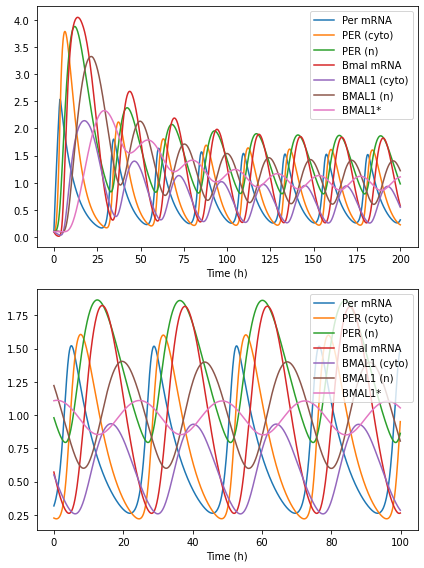

In [3]:
plt.figure(figsize=(6,8))
plt.subplot( 2, 1, 1)
plt.plot( sol1.t, sol1.y.T )
plt.xlabel( "Time (h)")
plt.legend( ['Per mRNA','PER (cyto)','PER (n)','Bmal mRNA','BMAL1 (cyto)','BMAL1 (n)',"BMAL1*"])
plt.subplot( 2, 1, 2 )
plt.plot( sol2.t, sol2.y.T )
plt.xlabel( "Time (h)")
plt.legend( ['Per mRNA','PER (cyto)','PER (n)','Bmal mRNA','BMAL1 (cyto)','BMAL1 (n)',"BMAL1*"])

plt.tight_layout()

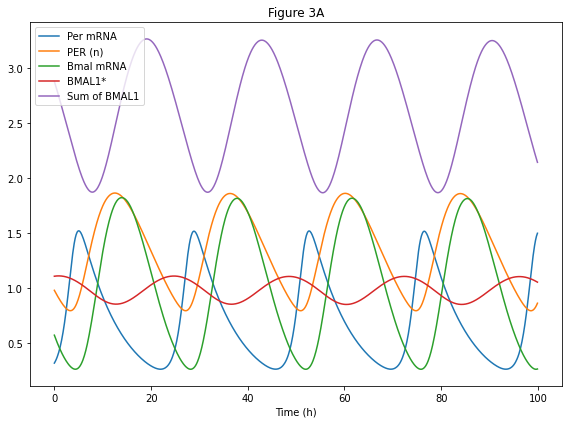

In [4]:
plt.figure(figsize=(8,6))
plt.plot(sol2.t, sol2.y[0].T)
plt.plot(sol2.t, sol2.y[2].T)
plt.plot(sol2.t, sol2.y[3].T)
plt.plot(sol2.t, sol2.y[6].T)
plt.plot(sol2.t, np.sum(sol2.y[4:7], axis=0).T)
plt.title("Figure 3A")
plt.xlabel( "Time (h)")
plt.legend( ['Per mRNA', 'PER (n)','Bmal mRNA', "BMAL1*", "Sum of BMAL1"])

plt.tight_layout()

### Analyzing Timing

In [5]:
rk23_1_time = %timeit -o rk23_1_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-8, method='RK23' )
rk23_2_time = %timeit -o rk23_2_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-3, method='RK23' )

rk45_1_time = %timeit -o rk45_1_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-8, method='RK45' )
rk45_2_time = %timeit -o rk45_2_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-3, method='RK45' )

dop853_1_time = %timeit -o dop853_1_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-8, method='DOP853' )
dop853_2_time = %timeit -o dop853_2_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-3, method='DOP853' )

radau_1_time = %timeit -o radau_1_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-8, method='Radau' )
radau_2_time = %timeit -o radau_2_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-3, method='Radau' )

bdf_1_time = %timeit -o bdf_1_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-8, method='BDF' )
bdf_2_time = %timeit -o bdf_2_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-3, method='BDF' )

lsoda_1_time = %timeit -o lsoda_1_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-8, method='LSODA' )
lsoda_2_time = %timeit -o lsoda_2_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-3, method='LSODA' )


3.53 s ± 419 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
307 ms ± 67.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.33 s ± 176 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
528 ms ± 168 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
943 ms ± 34.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
449 ms ± 13.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
10.3 s ± 3.68 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.24 s ± 152 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.21 s ± 1.44 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.13 s ± 353 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
498 ms ± 18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
233 ms ± 11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


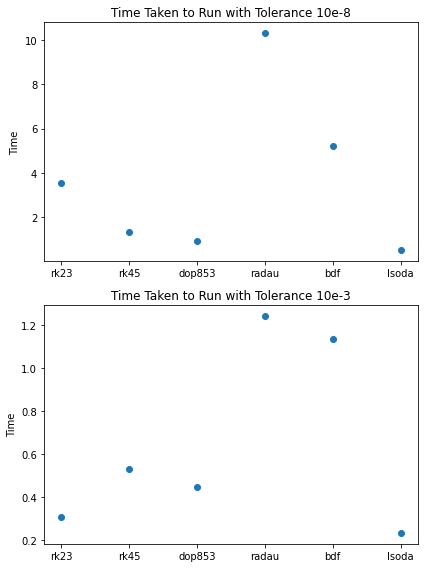

In [6]:
x = ["rk23", "rk45", "dop853", "radau", "bdf", "lsoda"]
y1 = [rk23_1_time.average, rk45_1_time.average, dop853_1_time.average, radau_1_time.average, bdf_1_time.average, lsoda_1_time.average]
y2 = [rk23_2_time.average, rk45_2_time.average, dop853_2_time.average, radau_2_time.average, bdf_2_time.average, lsoda_2_time.average]
plt.figure(figsize=(6,8))
plt.subplot( 2, 1, 1)
plt.scatter(x, y1 )
plt.ylabel("Time")
plt.title("Time Taken to Run with Tolerance 10e-8")
plt.subplot( 2, 1, 2 )
plt.scatter( x, y2 )
plt.ylabel("Time")
plt.title("Time Taken to Run with Tolerance 10e-3")
plt.tight_layout()

We observed that with both tolerance levels, Radau and BDF took the longest amount of time. LSODA seems to take the least time with the tolerance of 10e-8 while rk23 took the least time with the tolerance of 10e-3. In both tolerance levels, the explicit solvers and all-purpose solvers generally take significantly less time to solve compared to the implicit solvers.

In [7]:
rk23_1_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-8, method='RK23' )
rk23_2_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-3, method='RK23' )

rk45_1_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-8, method='RK45' )
rk45_2_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-3, method='RK45' )

dop853_1_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-8, method='DOP853' )
dop853_2_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-3, method='DOP853' )

radau_1_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-8, method='Radau' )
radau_2_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-3, method='Radau' )

bdf_1_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-8, method='BDF' )
bdf_2_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-3, method='BDF' )

lsoda_1_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-8, method='LSODA' )
lsoda_2_sol = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=0.1*np.ones((7,)), rtol=10e-3, method='LSODA' )

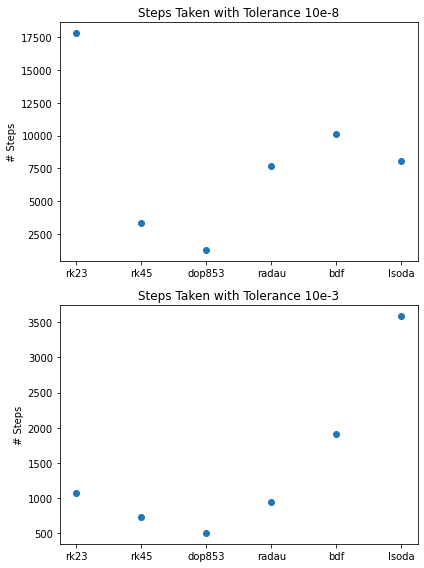

In [8]:
x = ["rk23", "rk45", "dop853", "radau", "bdf", "lsoda"]
y1 = [len(rk23_1_sol.t), len(rk45_1_sol.t), len(dop853_1_sol.t), len(radau_1_sol.t), len(bdf_1_sol.t), len(lsoda_1_sol.t)]
y2 = [len(rk23_2_sol.t), len(rk45_2_sol.t), len(dop853_2_sol.t), len(radau_2_sol.t), len(bdf_2_sol.t), len(lsoda_2_sol.t)]
plt.figure(figsize=(6,8))
plt.subplot( 2, 1, 1)
plt.scatter(x, y1 )
plt.ylabel("# Steps")
plt.title("Steps Taken with Tolerance 10e-8")
plt.subplot( 2, 1, 2 )
plt.scatter( x, y2 )
plt.ylabel("# Steps")
plt.title("Steps Taken with Tolerance 10e-3")
plt.tight_layout()

With a tolerance level of 10e-8, RK23 took the most steps, but with a tolerance of 10e-3,  LSODA took the most steps. However, with tolerance of 10e-8, RK23 took 17500 steps which was way higher than the second highest, BDF which took around 10000 steps and the third highest, LSODA, around 8200 steps. Radau is only slightly lower than LSODA. With tolerance of 10e-3, BDF had the second highest number of steps with RK23 being third and radau being a close fourth. It looks as though the low-order explicit solver tends to require way more steps with a higher tolerance level, and the higher order explicit solvers tend to take less steps than the implicit and all-purpose solvers. These figures also suggest that the system is not that stiff because the explicit methods don’t exhibit that much instability. With the exception of RK23, all the other explicit solvers generally took less steps than the implicit solvers.

### Analyzing Sensitivity

In [9]:
def sensitivity( fcn, ref_params, frac_change ):
    """
    fcn should be a handle to a function that takes a parameter set as input
        and returns a scalar as output.
    ref_params should be a 1D ndarray with the parameter set
    frac_change is the perturbation size, as a scale (i.e. the fraction by which you want to adjust the parameter by)
    """
    ref = fcn( ref_params );
    Srel = np.zeros((ref_params.size,));
    for i in range(ref_params.size):
        params = ref_params.copy();
        params[i] = (1+frac_change)*ref_params[i];
        output = fcn( params );
        Srel[i] = (output-ref)/frac_change;
    return Srel

In [10]:
def get_period(arr, t):
    
    peaks, _ = find_peaks(arr)
    time = []
    periods = []
    
    for peak in peaks:
        time.append(t[peak])
    
    for i in range(len(time)-1,0,-1):
        periods.append(time[i] - time[i-1])
        
    return np.mean(periods), np.std(periods)

def simulate_bw(params, t0=0, tStop=240, dt=0.1):
    
    mf = lambda t,y : bw_oscillator(t,y, params)

    sol1 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,200), y0=0.1*np.ones((7,)), 
                                    t_eval=np.arange(0,200,.1) )
    sol2 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,100), y0=sol1.y[:,-1], 
                                    t_eval=np.arange(0,100,.1) )
    return sol2

def bw_period( params ):
    """ Simulate the Golbeter's model with the given parameters
        and return the period (a scalar) """
    sol = simulate_bw( params )
    (per,sdper) = get_period(sol.y[0,:], sol.t)
    return per

def bw_amplitude( params, which_state=-1 ):
    """ Return the amplitude of the given state or of the sum of all three states
        If which_state  == -1, then return the sum of all 7.
        If which_state == -2, then return amplitude of total Bmal1
        Otherwise, which_state should be the index of the state
    """
    sol = simulate_bw( params )
    if which_state == -1:
        return np.sum(sol.y.max(axis=1)-sol.y.min(axis=1))
    elif which_state == -2:
        bmal1 = np.sum(sol.y[[4,5,6],:],axis=0)
        return bmal1.max() - bmal1.min()
    else:
        return sol.y[which_state,:].max() - sol.y[which_state,:].min()

In [11]:
param_names = ["v1b", "k1b", "k1i", "c", "p", "k1d", "k2b", "q", "k2d", "k2t", "k3t", "k3d", "v4b", "k4b", "r", "k4d", "k5b", "k5d", "k5t", "k6t", "k6d", "k6a", "k7a", "k7d"]
pdict = {}
for i in range(len(param_names)):
    pdict[param_names[i]] = i
    
def get_indices_from_names(which_param_names):
    """ Given a list of names, use pdict to return a list of their indices.
    """
    idxs = []
    for pn in which_param_names:
        idxs.append(pdict[pn])

    return idxs

def plot_boxes(sens,which_param_names,ylab,title,showfliers=True):
    """ 
    Make a box plot of the sensitivities for just the given parameters.
    Use the given ylabel and title.
    sens is M x NP where NP is the number of parameters.
    which_param_names is a list of parameter names. 
    """
    plt.figure( figsize=(len(which_param_names)/2,4) )
    idxs = get_indices_from_names(which_param_names)
    plt.boxplot( sens[:,idxs], showfliers=showfliers );
    plt.axhline(color='gray')
    plt.xticks( ticks=np.arange(1,len(which_param_names)+1), labels=which_param_names);
    plt.ylabel( ylab )
    plt.title( title )

In [12]:
sol = simulate_bw(params)
per_y1 = get_period(sol.y[0,:], sol.t)[0]
per_y3 = get_period(sol.y[2,:], sol.t)[0]
per_y4 = get_period(sol.y[3,:], sol.t)[0]
per_y6 = get_period(sol.y[5,:], sol.t)[0]

In [13]:
periods_y1_1 = []
periods_y1_2 = []
periods_y3_1 = []
periods_y3_2 = []
periods_y4_1 = []
periods_y4_2 = []
periods_y6_1 = []
periods_y6_2 = []
for i in range(len(params)):
    tmp_params = np.array(params)
    tmp_params[i] = tmp_params[i]*1.05
    sol = simulate_bw(tmp_params)
    periods_y1_1.append(get_period(sol.y[0,:], sol.t)[0])
    periods_y3_1.append(get_period(sol.y[2,:], sol.t)[0])
    periods_y4_1.append(get_period(sol.y[3,:], sol.t)[0])
    periods_y6_1.append(get_period(sol.y[5,:], sol.t)[0])
    
for i in range(len(params)):
    tmp_params = np.array(params)
    tmp_params[i] = tmp_params[i]*1.3
    sol = simulate_bw(tmp_params)
    periods_y1_2.append(get_period(sol.y[0,:], sol.t)[0])
    periods_y3_2.append(get_period(sol.y[2,:], sol.t)[0])
    periods_y4_2.append(get_period(sol.y[3,:], sol.t)[0])
    periods_y6_2.append(get_period(sol.y[5,:], sol.t)[0])
    

Unpermutated Period: 23.833333333333332


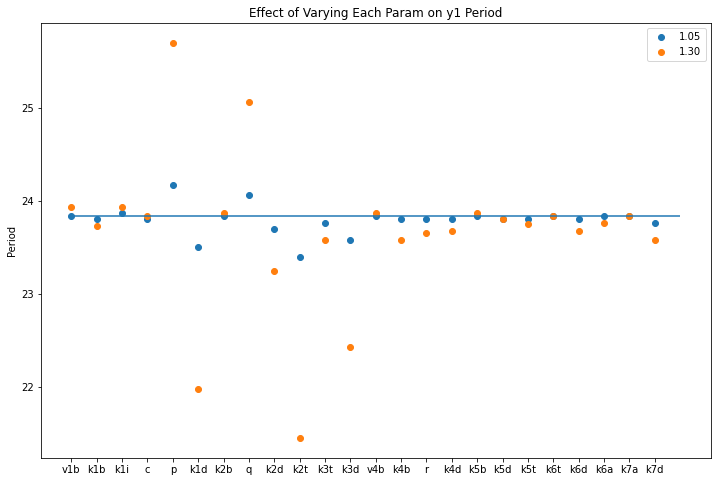

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(param_names, periods_y1_1 )
plt.scatter(param_names, periods_y1_2 )
plt.hlines(per_y1, 0, 24)
plt.ylabel("Period")
plt.title("Effect of Varying Each Param on y1 Period")
plt.legend(["1.05", "1.30"])
print(f"Unpermutated Period: {per_y1}")

Unpermutated Period: 23.833333333333332


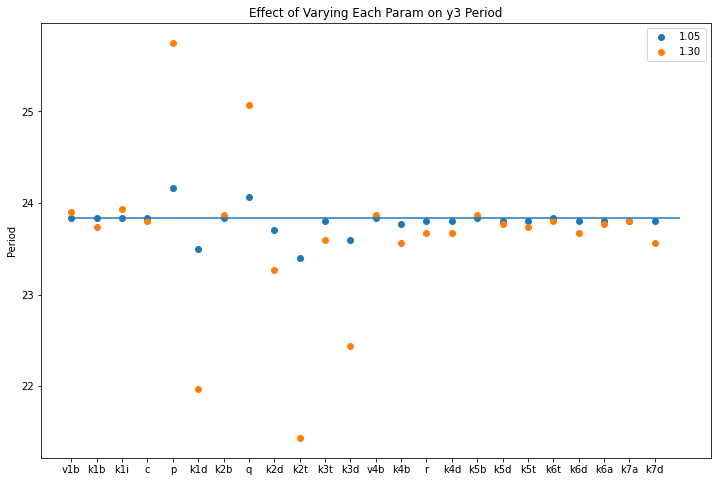

In [15]:
plt.figure(figsize=(12,8))
plt.scatter(param_names, periods_y3_1 )
plt.scatter(param_names, periods_y3_2 )
plt.hlines(per_y3, 0, 24)
plt.ylabel("Period")
plt.title("Effect of Varying Each Param on y3 Period")
plt.legend(["1.05", "1.30"])
print(f"Unpermutated Period: {per_y3}")

Unpermutated Period: 23.833333333333332


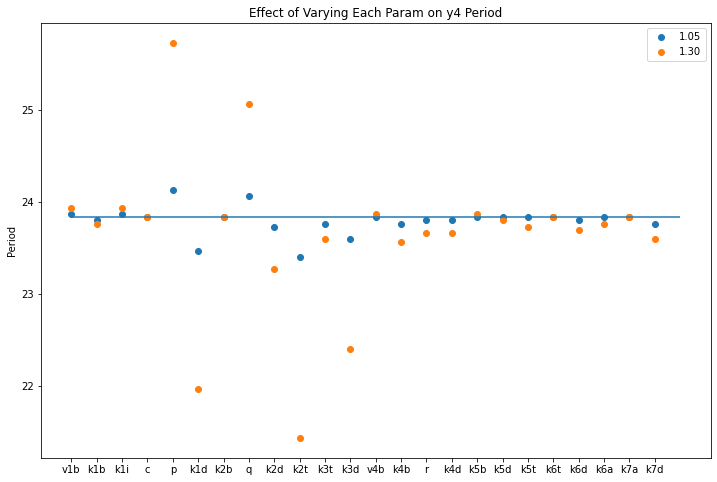

In [16]:
plt.figure(figsize=(12,8))
plt.scatter(param_names, periods_y4_1 )
plt.scatter(param_names, periods_y4_2 )
plt.hlines(per_y4, 0, 24)
plt.ylabel("Period")
plt.title("Effect of Varying Each Param on y4 Period")
plt.legend(["1.05", "1.30"])
print(f"Unpermutated Period: {per_y4}")

Unpermutated Period: 23.8


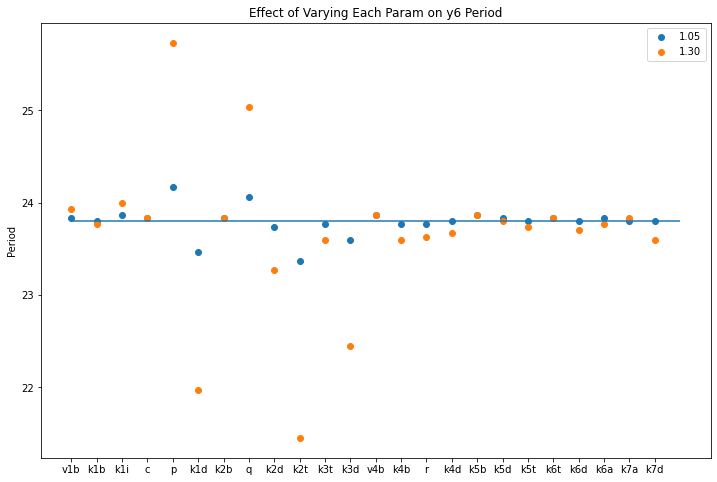

In [17]:
plt.figure(figsize=(12,8))
plt.scatter(param_names, periods_y6_1 )
plt.scatter(param_names, periods_y6_2 )
plt.hlines(per_y6, 0, 24)
plt.ylabel("Period")
plt.title("Effect of Varying Each Param on y6 Period")
plt.legend(["1.05", "1.30"])
print(f"Unpermutated Period: {per_y6}")

We varied each param by multiplying it by 1.05 and 1.30 while leaving the other parameters unchanged and taking the period of the specified state variable. We plotted y1, y3, y4, and y6 to do a more thorough comparison but all of them generally have the unpermuted period of 23.8 and the variables that are the most sensitive are p, k1d, q, k2t, and k3d for all of them. Multiplying each param by 1.30 also seems to vary the period in the same direction as multiplication by 1.05, just with greater impact.
If we look at the effect of each variable:

p: increase causes effect of y3 in f_1 to increase, so increases y1

k1d: degradation rate, an increase decreases y1

q: increases effect of y1, increases y2

k2t: increases y3

k3d: degradation rate, an increase decreases y3

It looks like in general, y1 and y3 are most effected by parameter changes with y2 being the 3rd most effected.


# Extension 1

Apply the sensitivity analysis of Stelling et al (2004) to the mammalian model:
Consolidate the sensitivity information using the vector 2-norm. In other words, from your three-dimensional matrix, extract the information for a given parameter, reshape it into a vector, and call Numpy's \lstinline!norm! function on it. That gives each parameter a scalar sensitivity measure.
Rank the parameters from most to least sensitive. In keeping with the analysis of Stelling et al. the rank should be 0 for the most sensitive and 1 for the least sensitive. In other words, if parameter  𝑖
i
  is the least sensitive, then its ``raw rank'' is 1 and if parameter  𝑗
j
  is the most sensitive, then its raw rank is  𝑁𝑝
N
p
  (where  𝑁𝑝
N
p
  is the number of parameters). To convert from raw rank to rank, use  
    rank = (NP - raw_rank)/(NP-1);
Can you come to the same conclusions about this model as Stelling et al. came to regarding the fly clock models?

On to norms! Grrr!!! I think I screwed that explanation up. I suggest you use the period sensitivity, which already has one value per parameter. You can compute the raw rank from that, then the rank. I would use this approach to reproduce Fig 3. in Stelling's paper.

In [18]:
params = [v1b,k1b,k1i,c,p,k1d,k2b,q,k2d,k2t,k3t,k3d,v4b,k4b,r,k4d,k5b,k5d,k5t,k6t,k6d,k6a,k7a,k7d]
param_names = ['v1b','k1b','k1i','c','p','k1d','k2b','q','k2d','k2t','k3t','k3d','v4b','k4b','r','k4d',
               'k5b','k5d','k5t','k6t','k6d','k6a','k7a','k7d']

period 23.833333333333332


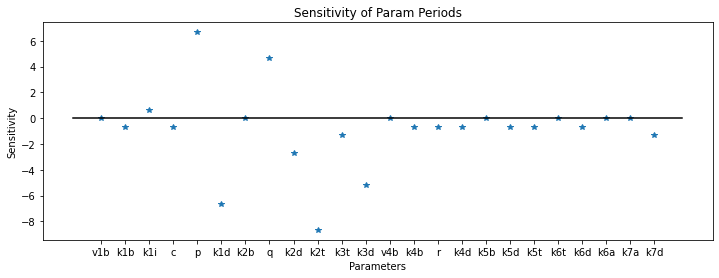

In [61]:
per = #Sorts the lists by paramaters.
per_index.sort(key = lambda x: x[0])  
amp_index.sort(key = lambda x: x[0]) 

per_ranks = [item[1] for item in per_index]
amp_ranks = [item[1] for item in amp_index]

plt.scatter(per_ranks, amp_ranks)
plt.plot([0, 1], [0, 1])
plt.title("Figure 3")
plt.xlabel("Rank Period Sensitivity")
plt.ylabel("Rank Amplitude Sensitivity")
print("period", per)

#Sensitivity of the period.
Srel_per = sensitivity(bw_period, np.array(params), 0.05)
plt.figure(figsize=(12,4))
plt.plot(np.arange(len(params)), Srel_per, '*')
plt.plot(plt.xlim(), [0, 0], 'k');
plt.xticks(ticks=np.arange(len(param_names)), labels=param_names);
plt.xlabel("Parameters")
plt.ylabel("Sensitivity")
plt.title("Sensitivity of Param Periods");

*Extension Figure 1: Sensitivity of Period for Each Params in Mammalian Model*

To begin the process of applying the sensitivity analysis of Stelling et al (2004) to the mammalian model, we found the sensitivity of the periods for each parameters. The parameters are fairly insensitive, but the parameters p, k1d, q, k2t, and k3d are very sensitive perturbations. 

In [41]:
#Finds the ranks for period sensitivities.

per_ab = np.absolute(Srel_per)
per_index = []

#Finds the raw rank.
for i in range(len(per_ab)):
    
    li = [param_names[i], per_ab[i]]
    per_index.append(li)
    
per_index.sort(key = lambda x: x[1]) 
print("Raw Rank:\n\n", per_index)

#Finds the rank based on rank = (NP - raw_rank)/(NP-1).
for j in range(len(per_index)):

    per_index[j][1] = (24 - (j+1))/(24-1)
    
print("\nRank:\n\n", per_index)

Raw Rank:

 [['v1b', array([0.])], ['k2b', array([0.])], ['v4b', array([0.])], ['k5b', array([0.])], ['k6t', array([0.])], ['k6a', array([0.])], ['k7a', array([0.])], ['k1b', array([0.66666667])], ['k1i', array([0.66666667])], ['k4b', array([0.66666667])], ['r', array([0.66666667])], ['k4d', array([0.66666667])], ['k5d', array([0.66666667])], ['k5t', array([0.66666667])], ['k6d', array([0.66666667])], ['c', array([0.66666667])], ['k3t', array([1.33333333])], ['k7d', array([1.33333333])], ['k2d', array([2.66666667])], ['q', array([4.66666667])], ['k3d', array([5.16666667])], ['k1d', array([6.66666667])], ['p', array([6.66666667])], ['k2t', array([8.66666667])]]

Rank:

 [['v1b', 1.0], ['k2b', 0.9565217391304348], ['v4b', 0.9130434782608695], ['k5b', 0.8695652173913043], ['k6t', 0.8260869565217391], ['k6a', 0.782608695652174], ['k7a', 0.7391304347826086], ['k1b', 0.6956521739130435], ['k1i', 0.6521739130434783], ['k4b', 0.6086956521739131], ['r', 0.5652173913043478], ['k4d', 0.5217391304

total amplitude 7.022842660729926 



Text(0, 0.5, 'Sensitivity')

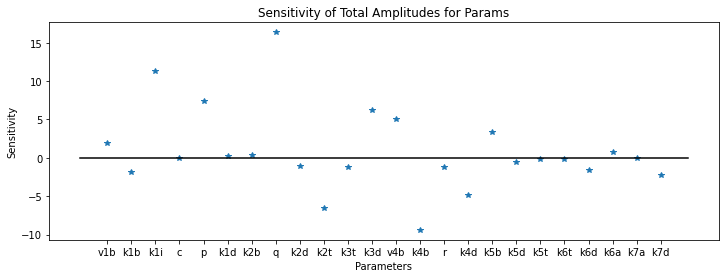

In [63]:
#Sum amplitude of the state variables.
ampTot = bw_amplitude(params, which_state = -1 )
print("total amplitude", ampTot, "\n")

#Sensitivity of the amplitude.
Srel_amp = sensitivity(lambda p: bw_amplitude(p, which_state = -1), np.array(params), 0.05)
plt.figure(figsize=(12,4))
plt.plot( np.arange(len(params)), Srel_amp, '*')
plt.plot(plt.xlim(), [0, 0], 'k');
plt.xticks(ticks=np.arange(len(param_names)), labels=param_names);
plt.title("Sensitivity of Total Amplitudes for Params");
plt.xlabel("Parameters")
plt.ylabel("Sensitivity")

*Extension Figure 2: Sensitivites of Total Amplitudes for Each Parameters*

The amplitudes of the parameters are generally more sensitive than the periods of the parameters because there are fewer parameters close to 0. When we look back at Extension Figure 1, we found that the parameters p, k1d, q, k2t, and k3d are more sensitive to change. In this figure, we find that the parameters more sensitive are k1i, q, and k4b.

In [45]:
#Finds the ranks for amplitude sensitivities.

amp_ab = np.absolute(Srel_amp)
amp_index = []

#Finds the raw rank.
for i in range(len(amp_ab)):
    
    li = [param_names[i], amp_ab[i]]
    amp_index.append(li)
    
amp_index.sort(key = lambda x: x[1]) 
print("Raw Rank:\n\n", amp_index)

#Finds the rank based on rank = (NP - raw_rank)/(NP-1).
for j in range(len(amp_index)):

    amp_index[j][1] = (24 - (j+1))/(24-1)
    
print("\nRank:\n\n", amp_index)

Raw Rank:

 [['c', 0.013792865500494855], ['k7a', 0.04795602204954008], ['k6t', 0.15144440980042972], ['k5t', 0.17555077211289571], ['k1d', 0.1790939400992464], ['k2b', 0.4356414063258818], ['k5d', 0.5138731531724972], ['k6a', 0.7787656836546297], ['k2d', 1.116868696028881], ['k3t', 1.1300418284388236], ['r', 1.1809046898490116], ['k6d', 1.5816495027519473], ['v1b', 1.8722192167393281], ['k1b', 1.8838232390865706], ['k7d', 2.2572241378227353], ['k5b', 3.4289224872790314], ['k4d', 4.877110551379058], ['v4b', 5.018944222603139], ['k3d', 6.236559625379314], ['k2t', 6.534037219301627], ['p', 7.4016567317309345], ['k4b', 9.387515106825521], ['k1i', 11.342930622638914], ['q', 16.367862440505725]]

Rank:

 [['c', 1.0], ['k7a', 0.9565217391304348], ['k6t', 0.9130434782608695], ['k5t', 0.8695652173913043], ['k1d', 0.8260869565217391], ['k2b', 0.782608695652174], ['k5d', 0.7391304347826086], ['k6a', 0.6956521739130435], ['k2d', 0.6521739130434783], ['k3t', 0.6086956521739131], ['r', 0.5652173913

Text(0, 0.5, 'Rank Amplitude Sensitivity')

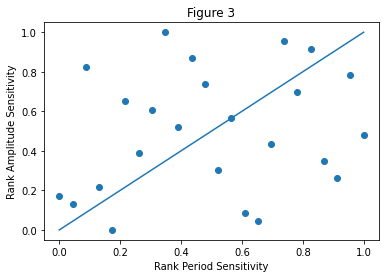

In [59]:
#Sorts the lists by paramaters.
per_index.sort(key = lambda x: x[0])  
amp_index.sort(key = lambda x: x[0]) 

per_ranks = [item[1] for item in per_index]
amp_ranks = [item[1] for item in amp_index]

plt.scatter(per_ranks, amp_ranks)
plt.plot([0, 1], [0, 1])
plt.title("Figure 3")
plt.xlabel("Rank Period Sensitivity")
plt.ylabel("Rank Amplitude Sensitivity")

*Extension Figure 3: Influence of the Parameters on the Periods and Amplitudes*

![Figure3.png](Figure3.png)

To approach applying the sensitivity analysis of Stelling et al (2004) to the mammalian model, we ordered the parameters from least sensitive to most sensitive based on their sensitivity values for total amplitude and period. We then assigned them a rank based on their index to create a raw rank and then normalized this to a 0-1 scale to rank. The diagonal line on the figure indicates the positions at which both measures of relative sensitivity are identical. Parameters above the line have a amplitude that is more biased towards changing in response to perturbation and parameters below the lines have a period that is more biased towards changing in response to perturbation. In the figure, we see that 13 parameters are biased towards amplitude changes, with 10 parameters being biased towards period changes. We find that there is only 1 parameter that is on the diagonal line, meaning that this parameter is relatively identically biased towards amplitude and period changes. When we compare our figure to Figure 3 of the Stelling et al (2004) paper, we find that our parameters are more scattered across the figure, meanwhile their paramaters are relatively tight to the diagonal lines in their plots. Stelling et al conclude that "the global indicators used lead to consistent characterizations of robustness properties that can be interpreted meaningfully in biological terms". We think that for this model, it is harder to come to this same conclusion because of the amount of relatively more biased parameters in regards to amplitude and period. 

# Extension 2

Applying Stelling et al. (2004) sensitivity analysis to Goodwin oscillator model.

In [67]:
def goodwin_oscillator(t, statevars, params):
    
    X = statevars[0];
    Y = statevars[1];
    Z = statevars[2];
    
    alpha_1 = params[0]
    K       = params[1]
    n       = params[2]
    gamma_1 = params[3]
    alpha_2 = params[4]
    gamma_2 = params[5]
    alpha_3 = params[6]
    gamma_3 = params[7]
        
    dydt    = np.zeros((3,))
    dydt[0] = alpha_1*K**n/(K**n+Z**n) - gamma_1*X
    dydt[1] = alpha_2*X - gamma_2*Y;
    dydt[2] = alpha_3*Y - gamma_3*Z;

    return dydt

def simulate_goodwin( params, t0=0, tStop=240, dt=0.1 ):
    """ Simulate the Goodwin oscillator with the given parameters
        at the given time steps and return the solution record. """
    yinit = np.ones((3,));
    sol = scipy.integrate.solve_ivp(fun=goodwin_oscillator, t_span=(0,10*24), y0=yinit, method='RK45', 
                                    t_eval=np.arange(0,10*24,0.1), args=[params] )
    sol = scipy.integrate.solve_ivp(fun=goodwin_oscillator, t_span=(0,10*24), y0=sol.y[:,-1], method='RK45', 
                                    t_eval=np.arange(t0,tStop,dt), args=[params], rtol=1e-8 )

    return sol

def goodwin_period( params ):
    """ Simulate the Goodwin oscillator with the given parameters
        and return the period (a scalar)
    """
    sol = simulate_goodwin( params )
    (per,sdper) = get_period(sol.y[0,:], sol.t)
    return per

def goodwin_amplitude( params, which_state=-1 ):
    """ Return the amplitude of the given state or of the sum of all three states
        If which_state  == -1, then return the sum of all 3.
        Otherwise, which_state should be 0 (for M), 1 (for P), or 2 (for I)
    """
    sol = simulate_goodwin( params )
    if which_state == -1:
        return np.sum(sol.y.max(axis=1)-sol.y.min(axis=1))
    else:
        return sol.y[which_state,:].max() - sol.y[which_state,:].min()

In [65]:
alpha_1 = 1
K = 0.61
n = 11
gamma_1 = 0.15
alpha_2 = 1
gamma_2 = 0.15
alpha_3 = 1
gamma_3 = 0.25

params = [alpha_1,K,n,gamma_1,alpha_2,gamma_2,alpha_3,gamma_3]
param_names = ['alpha_1','K','n','gamma_1','alpha_2','gamma_2','alpha _3','gamma_3']

period 22.240000000000002


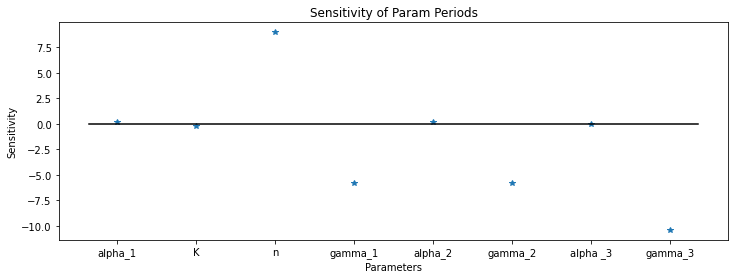

In [70]:
per = goodwin_period(params)
print("period", per)

#Sensitivity of the period.
Srel_per = sensitivity(goodwin_period, np.array(params), 0.05)
plt.figure(figsize=(12,4))
plt.plot(np.arange(len(params)), Srel_per, '*')
plt.plot(plt.xlim(), [0, 0], 'k');
plt.xticks(ticks=np.arange(len(param_names)), labels=param_names);
plt.xlabel("Parameters")
plt.ylabel("Sensitivity")
plt.title("Sensitivity of Param Periods");

*Extension Figure 4: Sensitivity Plot of Period for Each Parameters*

We can see that alpha 1, K, alpha 2, and alpha 3 are relatively insensitive to perturbation while n, gamma 1, gamma 2, and gamma 3 are relatively sensitive to perturbation in regards to the period.

In [71]:
#Finds the ranks for period sensitivities.

per_ab = np.absolute(Srel_per)
per_index = []

#Finds the raw rank.
for i in range(len(per_ab)):
    
    li = [param_names[i], per_ab[i]]
    per_index.append(li)
    
per_index.sort(key = lambda x: x[1]) 
print("Raw Rank:\n\n", per_index)

#Finds the rank based on rank = (NP - raw_rank)/(NP-1).
for j in range(len(per_index)):

    per_index[j][1] = (8 - (j+1))/(8-1)
    
print("\nRank:\n\n", per_index)

Raw Rank:

 [['alpha _3', 0.0], ['alpha_1', 0.1999999999999602], ['alpha_2', 0.1999999999999602], ['K', 0.20000000000003126], ['gamma_1', 5.800000000000054], ['gamma_2', 5.800000000000054], ['n', 8.977777777777689], ['gamma_3', 10.400000000000063]]

Rank:

 [['alpha _3', 1.0], ['alpha_1', 0.8571428571428571], ['alpha_2', 0.7142857142857143], ['K', 0.5714285714285714], ['gamma_1', 0.42857142857142855], ['gamma_2', 0.2857142857142857], ['n', 0.14285714285714285], ['gamma_3', 0.0]]


total amplitude 0.8781071681211667 



Text(0, 0.5, 'Sensitivity')

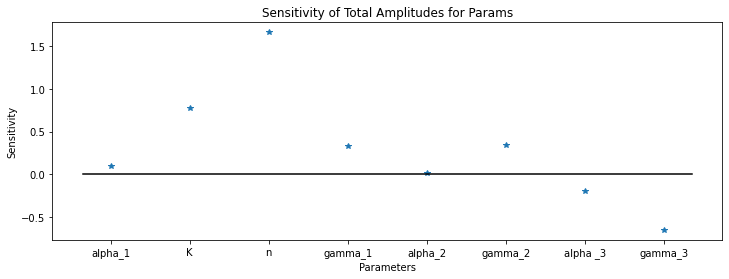

In [72]:
#Sum amplitude of the state variables.
ampTot = goodwin_amplitude(params, which_state = -1 )
print("total amplitude", ampTot, "\n")

#Sensitivity of the amplitude.
Srel_amp = sensitivity(lambda p: goodwin_amplitude(p, which_state = -1), np.array(params), 0.05)
plt.figure(figsize=(12,4))
plt.plot( np.arange(len(params)), Srel_amp, '*')
plt.plot(plt.xlim(), [0, 0], 'k');
plt.xticks(ticks=np.arange(len(param_names)), labels=param_names);
plt.title("Sensitivity of Total Amplitudes for Params");
plt.xlabel("Parameters")
plt.ylabel("Sensitivity")

*Extension Figure 5: Sensitivity of Total Amplitudes for Parameters*

We can see that alpha 1, gamma 1, alpha 2, gamma 2, alpha 3 are relatively insensitive to perturationin while  K, n, and gamma 3 are relatively sensitive to perturbation in regards to the amplitude. Compared to the period sensitivities, here K is more sensitive and gamma 1 and gamma 2 are more insensitive. 

In [73]:
#Finds the ranks for amplitude sensitivities.

amp_ab = np.absolute(Srel_amp)
amp_index = []

#Finds the raw rank.
for i in range(len(amp_ab)):
    
    li = [param_names[i], amp_ab[i]]
    amp_index.append(li)
    
amp_index.sort(key = lambda x: x[1]) 
print("Raw Rank:\n\n", amp_index)

#Finds the rank based on rank = (NP - raw_rank)/(NP-1).
for j in range(len(amp_index)):

    amp_index[j][1] = (8 - (j+1))/(8-1)
    
print("\nRank:\n\n", amp_index)

Raw Rank:

 [['alpha_2', 0.015277231057182483], ['alpha_1', 0.09142267680216865], ['alpha _3', 0.1967969036813133], ['gamma_1', 0.3246789365131786], ['gamma_2', 0.3455512487869683], ['gamma_3', 0.6537572971913885], ['K', 0.7700313634555633], ['n', 1.661757615516577]]

Rank:

 [['alpha_2', 1.0], ['alpha_1', 0.8571428571428571], ['alpha _3', 0.7142857142857143], ['gamma_1', 0.5714285714285714], ['gamma_2', 0.42857142857142855], ['gamma_3', 0.2857142857142857], ['K', 0.14285714285714285], ['n', 0.0]]


Text(0, 0.5, 'Rank Amplitude Sensitivity')

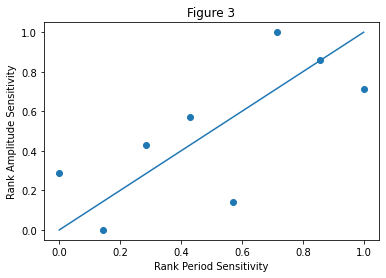

In [74]:
#Sorts the lists by paramaters.
per_index.sort(key = lambda x: x[0])  
amp_index.sort(key = lambda x: x[0]) 

per_ranks = [item[1] for item in per_index]
amp_ranks = [item[1] for item in amp_index]

plt.scatter(per_ranks, amp_ranks)
plt.plot([0, 1], [0, 1])
plt.title("Figure 3")
plt.xlabel("Rank Period Sensitivity")
plt.ylabel("Rank Amplitude Sensitivity")

*Extension Figure 6: Influence of the Parameters on the Periods and Amplitudes*

![ExtensionFigure3.png](ExtensionFigure3.png)

We applied the sensitivity analysis of Stelling et al (2004) for the Goodwin oscillator model. In the figure, we see that 4 parameters are biased towards amplitude changes, with 3 parameters being biased towards period changes, and 1 that is on the diagonal line, meaning that this parameter is relatively identically biased towards amplitude and period changes. Compared to the sensitivies for the mammalian model, the sensitivies for the Goodwin oscillator model are much less biased towards either the amplitude or period. 

# Extension 3

Sample parameter space and perform sensitivity analysis at each of the new parameter sets (but only for those parameter sets that cause the system to oscillate). Compute the sensitivity rankings for each parameter set. Use them to produce a figure like Figure 2 by Stelling et al. (2004).

In [171]:
v1b = np.random.uniform(8, 10) # maximal rate of Per2/Cry transcription
k1b = np.random.uniform(0, 2) # activation threshold for Per2/Cry transcription
k1i = np.random.uniform(0, 1) # inhibition constant of Per2/Cry transcription
c = np.random.uniform(0, 1) # concentration of constituative activator
p = np.random.uniform(7, 9) # Hill coefficient of inhibition of Per2/Cry transcription
k1d = np.random.uniform(0, 1) # degradation rate of Per2/Cry mRNA
k2b = np.random.uniform(0, 1) # complex formation rate of Per2/Cry mRNA
q = np.random.uniform(1, 3) # Number of PER2/CRY complex forming subunits
k2d = np.random.uniform(0, 1) # degradation rate of cytoplasmic PER2/CRY
k2t = np.random.uniform(0, 1) # nuclear import rate of teh PER2/CRY complex
k3t = np.random.uniform(0, 1) # nuclear export rate of teh PER2/CRY complex
k3d = np.random.uniform(0, 1) # degradation rate of nuclear PER2/CRY
v4b = np.random.uniform(2.6, 4.6) # maximal rate of Bmal1 transcription
k4b = np.random.uniform(1.16, 3.16) # activation threshold for Bmal1 transcription
r = np.random.uniform(2, 4) # Hill coefficient of activation of Bmal1 transcription
k4d = np.random.uniform(0, 1) # degradation rate of Bmal1 mRNA
k5b = np.random.uniform(0, 1) # translation rate of BMAL1
k5d = np.random.uniform(0, 1) # degradation rate of cytoplasmic BMAL1
k5t = np.random.uniform(0, 1) # nuclear import rate of BMAL1
k6t = np.random.uniform(0, 1) # nuclear export rate of BMAL1
k6d = np.random.uniform(0, 1) # degradation rate of nuclear BMAL1
k6a = np.random.uniform(0, 1) # activation rate of nuclear BMAL1
k7a = np.random.uniform(0, 1) # deactivation rate of nuclear BMAL1
k7d = np.random.uniform(0, 1) # degradataion rate of nuclear BMAL1

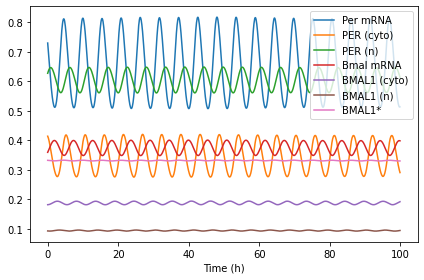

In [172]:
#First Parameter Set
params = (v1b,k1b,k1i,c,p,k1d,k2b,q,k2d,k2t,k3t,k3d,v4b,k4b,r,k4d,k5b,k5d,k5t,k6t,k6d,k6a,k7a,k7d)

mf = lambda t,y : bw_oscillator(t,y, params)

sol1 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,200), y0=0.1*np.ones((7,)), 
                                t_eval=np.arange(0,200,.1))
sol2 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,100), y0=sol1.y[:,-1], 
                                t_eval=np.arange(0,100,.1))

#Plots the model to determine if the system oscillates.
plt.plot( sol2.t, sol2.y.T )
plt.xlabel( "Time (h)")
plt.legend( ['Per mRNA','PER (cyto)','PER (n)','Bmal mRNA','BMAL1 (cyto)','BMAL1 (n)',"BMAL1*"])

plt.tight_layout()

*Extension Figure 7: Oscillation of Mammalian Model with First Parameter Set*

period 5.429411764705883


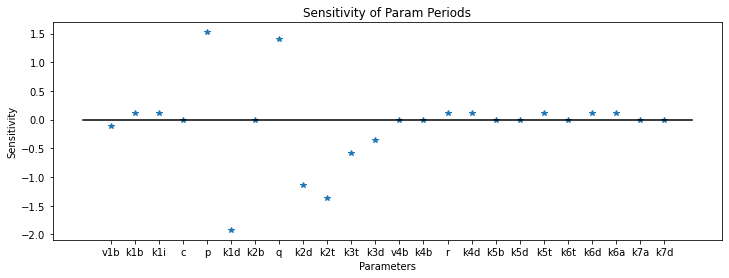

In [173]:
#Finds the period sensitivities for the first parameter set.

param_names = ["v1b", "k1b", "k1i", "c", "p", "k1d", "k2b", "q", "k2d", "k2t", "k3t", "k3d", "v4b", "k4b", "r", "k4d", "k5b", "k5d", "k5t", "k6t", "k6d", "k6a", "k7a", "k7d"]

per = bw_period(params)
print("period", per)

#Sensitivity of the period.
Srel_per = sensitivity(bw_period, np.array(params), 0.05)
plt.figure(figsize=(12,4))
plt.plot(np.arange(len(params)), Srel_per, '*')
plt.plot(plt.xlim(), [0, 0], 'k');
plt.xticks(ticks=np.arange(len(param_names)), labels=param_names);
plt.xlabel("Parameters")
plt.ylabel("Sensitivity")
plt.title("Sensitivity of Param Periods");

*Extension Figure 8: Sensitivity of Period for Each Parameter*

In this graph, p, k1d, q, k2d, and k2t are particularly sensitive to period changes.

In [174]:
#Finds the ranks for period sensitivities.

per_ab = np.absolute(Srel_per)
per_index = []

#Finds the raw rank.
for i in range(len(per_ab)):
    
    li = [param_names[i], per_ab[i]]
    per_index.append(li)
    
per_index.sort(key = lambda x: x[1]) 
print("Raw Rank:\n\n", per_index)

#Finds the rank based on rank = (NP - raw_rank)/(NP-1).
for j in range(len(per_index)):

    per_index[j][1] = (24 - (j+1))/(24-1)
    
print("\nRank:\n\n", per_index)

Raw Rank:

 [['c', 0.0], ['k2b', 0.0], ['v4b', 0.0], ['k4b', 0.0], ['k5b', 0.0], ['k5d', 0.0], ['k6t', 0.0], ['k7a', 0.0], ['k7d', 0.0], ['v1b', 0.117647058823529], ['k1b', 0.117647058823529], ['k1i', 0.117647058823529], ['r', 0.117647058823529], ['k4d', 0.117647058823529], ['k5t', 0.117647058823529], ['k6a', 0.117647058823529], ['k6d', 0.11764705882354676], ['k3d', 0.3529411764705692], ['k3t', 0.588235294117645], ['k2d', 1.1437908496731808], ['k2t', 1.36601307189542], ['q', 1.411764705882348], ['p', 1.5228758169934764], ['k1d', 1.9215686274509913]]

Rank:

 [['c', 1.0], ['k2b', 0.9565217391304348], ['v4b', 0.9130434782608695], ['k4b', 0.8695652173913043], ['k5b', 0.8260869565217391], ['k5d', 0.782608695652174], ['k6t', 0.7391304347826086], ['k7a', 0.6956521739130435], ['k7d', 0.6521739130434783], ['v1b', 0.6086956521739131], ['k1b', 0.5652173913043478], ['k1i', 0.5217391304347826], ['r', 0.4782608695652174], ['k4d', 0.43478260869565216], ['k5t', 0.391304347826087], ['k6a', 0.347826086

total amplitude 0.017510489710722332 



Text(0, 0.5, 'Sensitivity')

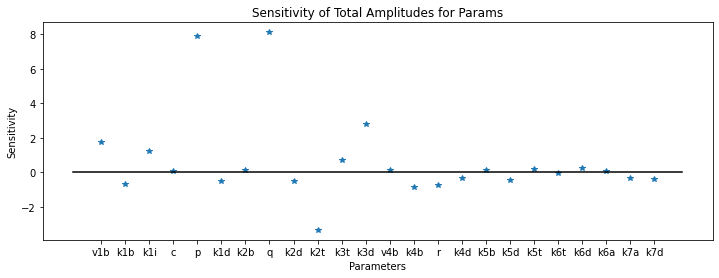

In [175]:
#Sum amplitude of the state variables.
ampTot = goodwin_amplitude(params, which_state = -1 )
print("total amplitude", ampTot, "\n")

#Sensitivity of the amplitude.
Srel_amp = sensitivity(lambda p: bw_amplitude(p, which_state = -1), np.array(params), 0.05)
plt.figure(figsize=(12,4))
plt.plot( np.arange(len(params)), Srel_amp, '*')
plt.plot(plt.xlim(), [0, 0], 'k');
plt.xticks(ticks=np.arange(len(param_names)), labels=param_names);
plt.title("Sensitivity of Total Amplitudes for Params");
plt.xlabel("Parameters")
plt.ylabel("Sensitivity")

*Extension Figure 9: Sensitivity of Total Amplitude for Each Parameter*

In this graph, p, k3d, q, and k2t are particularly sensitive to amplitude changes. Compared to period sensitivities, k3d is more sensitive but k2d is less sensitive.

In [176]:
#Finds the ranks for amplitude sensitivities.

amp_ab = np.absolute(Srel_amp)
amp_index = []

#Finds the raw rank.
for i in range(len(amp_ab)):
    
    li = [param_names[i], amp_ab[i]]
    amp_index.append(li)
    
amp_index.sort(key = lambda x: x[1]) 
print("Raw Rank:\n\n", amp_index)

#Finds the rank based on rank = (NP - raw_rank)/(NP-1).
for j in range(len(amp_index)):

    amp_index[j][1] = (24 - (j+1))/(24-1)
    
print("\nRank:\n\n", amp_index)

Raw Rank:

 [['k6t', 0.030666523047173655], ['k6a', 0.0678252099177934], ['c', 0.07712097839067678], ['k5b', 0.11504843784946761], ['v4b', 0.15972408484794975], ['k2b', 0.16633623501100425], ['k5t', 0.19049317594086013], ['k6d', 0.26553049471598644], ['k7a', 0.2953282340281982], ['k4d', 0.33214767185769656], ['k7d', 0.37971493079774987], ['k5d', 0.41976397169166235], ['k1d', 0.46739588693900824], ['k2d', 0.5200213590989922], ['k1b', 0.6786134473914052], ['k3t', 0.7191786129987987], ['r', 0.7439586483750205], ['k4b', 0.815175221866622], ['k1i', 1.2253696387666158], ['v1b', 1.787663958077479], ['k3d', 2.832165192016205], ['k2t', 3.329926209014925], ['p', 7.927165503633886], ['q', 8.1267283873873]]

Rank:

 [['k6t', 1.0], ['k6a', 0.9565217391304348], ['c', 0.9130434782608695], ['k5b', 0.8695652173913043], ['v4b', 0.8260869565217391], ['k2b', 0.782608695652174], ['k5t', 0.7391304347826086], ['k6d', 0.6956521739130435], ['k7a', 0.6521739130434783], ['k4d', 0.6086956521739131], ['k7d', 0.565

Text(0, 0.5, 'Rank Amplitude Sensitivity')

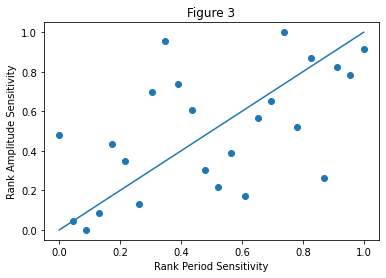

In [177]:
#Sorts the lists by paramaters.
per_index.sort(key = lambda x: x[0])  
amp_index.sort(key = lambda x: x[0]) 

per_ranks = [item[1] for item in per_index]
amp_ranks = [item[1] for item in amp_index]

plt.scatter(per_ranks, amp_ranks)
plt.plot([0, 1], [0, 1])
plt.title("Figure 3")
plt.xlabel("Rank Period Sensitivity")
plt.ylabel("Rank Amplitude Sensitivity")

*Extension Figure 10: Influence of the Parameters on the Periods and Amplitudes*

We applied the sensitivity analysis of Stelling et al (2004) for the mammalian model. In the figure, we see that 9 parameters are biased towards amplitude changes, with 14 parameters being biased towards period changes, and overall we notice that more parameters are more biased towards period changes. We also see that 1 parameter that is on the diagonal line, meaning that this parameter is relatively identically biased towards amplitude and period changes. 

Text(0, 0.5, 'Parameter Period Rank')

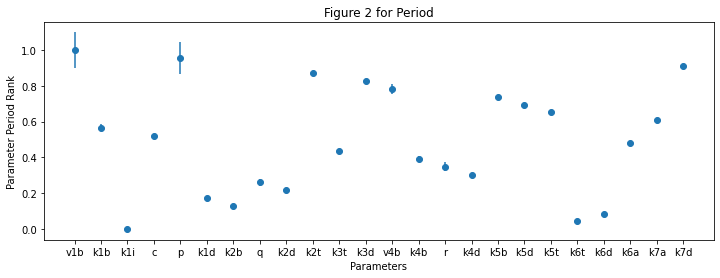

In [178]:
#Recreates a figure similar to Figure 2 for period from Stelling et al (2004) for the first parameter set.

#Calculates +/- 1% error to create error bars on plot.
tmp_params = np.array(params)
for i in range(len(params)):
    tmp_params[i] = (tmp_params[i]*1.01) - tmp_params[i]

plt.figure(figsize=(12,4))
plt.errorbar(np.arange(len(params)), per_ranks, yerr=tmp_params, fmt='o')
plt.xticks(ticks=np.arange(len(param_names)), labels=param_names);
plt.title("Figure 2 for Period");
plt.xlabel("Parameters")
plt.ylabel("Parameter Period Rank")

*Extension Figure 11: Replica of Figure 2 for Period from Stelling et al (2004) for the Mammalian Model*

We see that v1b and p have a relatively large standard error with a +/- 1% error rate for period. k1b, v4b, and r have a very small but noticable standard error as well. v1b has the highest rank, so it is the least sensitive to period changes, while k1i has the lowest rank, so it is the most sensitive to period changes. 

Text(0, 0.5, 'Parameter Amplitude Rank')

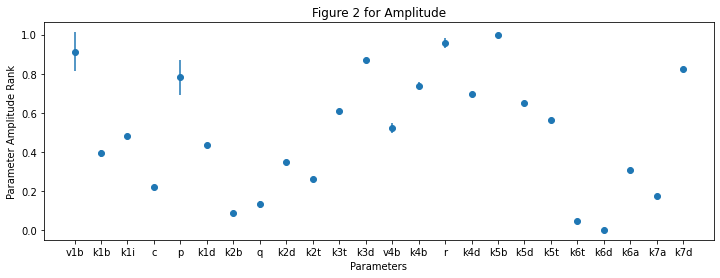

In [179]:
#Recreates a figure similar to Figure 2 for amplitude from Stelling et al (2004) for the third parameter set.

#Calculates +/- 1% error to create error bars on plot.
tmp_params = np.array(params)
for i in range(len(params)):
    tmp_params[i] = (tmp_params[i]*1.01) - tmp_params[i]

plt.figure(figsize=(12,4))
plt.errorbar(np.arange(len(params)), amp_ranks, yerr=tmp_params, fmt='o')
plt.xticks(ticks=np.arange(len(param_names)), labels=param_names);
plt.title("Figure 2 for Amplitude");
plt.xlabel("Parameters")
plt.ylabel("Parameter Amplitude Rank")

*Extension Figure 12: Replica of Figure 2 for Amplitude from Stelling et al (2004) for the Mammalian Model*

We see that v1b and p have a relatively large standard error with a +/- 1% error rate for amplitude. v4b and r have a very small but noticable standard error as well. Unlike the period ranks, k5b has the highest rank, so it is the least sensitive to period changes, while k6d has the lowest rank, so it is the most sensitive to period changes. 

In [122]:
v1b = np.random.uniform(8, 10) # maximal rate of Per2/Cry transcription
k1b = np.random.uniform(0, 2) # activation threshold for Per2/Cry transcription
k1i = np.random.uniform(0, 1) # inhibition constant of Per2/Cry transcription
c = np.random.uniform(0, 1) # concentration of constituative activator
p = np.random.uniform(7, 9) # Hill coefficient of inhibition of Per2/Cry transcription
k1d = np.random.uniform(0, 1) # degradation rate of Per2/Cry mRNA
k2b = np.random.uniform(0, 1) # complex formation rate of Per2/Cry mRNA
q = np.random.uniform(1, 3) # Number of PER2/CRY complex forming subunits
k2d = np.random.uniform(0, 1) # degradation rate of cytoplasmic PER2/CRY
k2t = np.random.uniform(0, 1) # nuclear import rate of teh PER2/CRY complex
k3t = np.random.uniform(0, 1) # nuclear export rate of teh PER2/CRY complex
k3d = np.random.uniform(0, 1) # degradation rate of nuclear PER2/CRY
v4b = np.random.uniform(2.6, 4.6) # maximal rate of Bmal1 transcription
k4b = np.random.uniform(1.16, 3.16) # activation threshold for Bmal1 transcription
r = np.random.uniform(2, 4) # Hill coefficient of activation of Bmal1 transcription
k4d = np.random.uniform(0, 1) # degradation rate of Bmal1 mRNA
k5b = np.random.uniform(0, 1) # translation rate of BMAL1
k5d = np.random.uniform(0, 1) # degradation rate of cytoplasmic BMAL1
k5t = np.random.uniform(0, 1) # nuclear import rate of BMAL1
k6t = np.random.uniform(0, 1) # nuclear export rate of BMAL1
k6d = np.random.uniform(0, 1) # degradation rate of nuclear BMAL1
k6a = np.random.uniform(0, 1) # activation rate of nuclear BMAL1
k7a = np.random.uniform(0, 1) # deactivation rate of nuclear BMAL1
k7d = np.random.uniform(0, 1) # degradataion rate of nuclear BMAL1

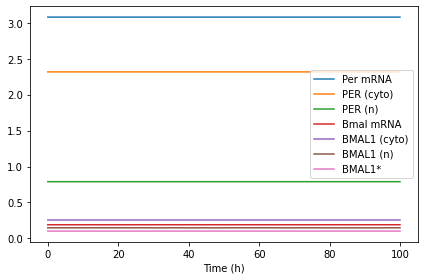

In [123]:
#Second Parameter Set

params = (v1b,k1b,k1i,c,p,k1d,k2b,q,k2d,k2t,k3t,k3d,v4b,k4b,r,k4d,k5b,k5d,k5t,k6t,k6d,k6a,k7a,k7d)

mf = lambda t,y : bw_oscillator(t,y, params)

sol1 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,200), y0=0.1*np.ones((7,)), 
                                t_eval=np.arange(0,200,.1))
sol2 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,100), y0=sol1.y[:,-1], 
                                t_eval=np.arange(0,100,.1))

#Plots the model to determine if the system oscillates.
plt.plot( sol2.t, sol2.y.T )
plt.xlabel( "Time (h)")
plt.legend( ['Per mRNA','PER (cyto)','PER (n)','Bmal mRNA','BMAL1 (cyto)','BMAL1 (n)',"BMAL1*"])

plt.tight_layout()

*Extension Figure 13: Oscillation of Mammalian Model with Second Parameter Set*

Since the model does not oscillate with this parameter set, we will not be performing a sensitivity analysis.

In [128]:
v1b = np.random.uniform(8, 10) # maximal rate of Per2/Cry transcription
k1b = np.random.uniform(0, 2) # activation threshold for Per2/Cry transcription
k1i = np.random.uniform(0, 1) # inhibition constant of Per2/Cry transcription
c = np.random.uniform(0, 1) # concentration of constituative activator
p = np.random.uniform(7, 9) # Hill coefficient of inhibition of Per2/Cry transcription
k1d = np.random.uniform(0, 1) # degradation rate of Per2/Cry mRNA
k2b = np.random.uniform(0, 1) # complex formation rate of Per2/Cry mRNA
q = np.random.uniform(1, 3) # Number of PER2/CRY complex forming subunits
k2d = np.random.uniform(0, 1) # degradation rate of cytoplasmic PER2/CRY
k2t = np.random.uniform(0, 1) # nuclear import rate of teh PER2/CRY complex
k3t = np.random.uniform(0, 1) # nuclear export rate of teh PER2/CRY complex
k3d = np.random.uniform(0, 1) # degradation rate of nuclear PER2/CRY
v4b = np.random.uniform(2.6, 4.6) # maximal rate of Bmal1 transcription
k4b = np.random.uniform(1.16, 3.16) # activation threshold for Bmal1 transcription
r = np.random.uniform(2, 4) # Hill coefficient of activation of Bmal1 transcription
k4d = np.random.uniform(0, 1) # degradation rate of Bmal1 mRNA
k5b = np.random.uniform(0, 1) # translation rate of BMAL1
k5d = np.random.uniform(0, 1) # degradation rate of cytoplasmic BMAL1
k5t = np.random.uniform(0, 1) # nuclear import rate of BMAL1
k6t = np.random.uniform(0, 1) # nuclear export rate of BMAL1
k6d = np.random.uniform(0, 1) # degradation rate of nuclear BMAL1
k6a = np.random.uniform(0, 1) # activation rate of nuclear BMAL1
k7a = np.random.uniform(0, 1) # deactivation rate of nuclear BMAL1
k7d = np.random.uniform(0, 1) # degradataion rate of nuclear BMAL1

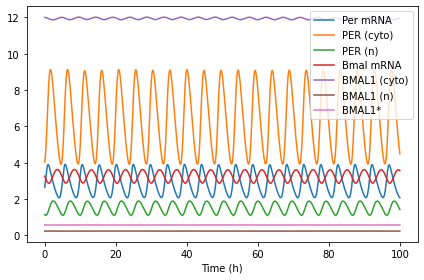

In [129]:
#Third Parameter Set
params = (v1b,k1b,k1i,c,p,k1d,k2b,q,k2d,k2t,k3t,k3d,v4b,k4b,r,k4d,k5b,k5d,k5t,k6t,k6d,k6a,k7a,k7d)

mf = lambda t,y : bw_oscillator(t,y, params)

sol1 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,200), y0=0.1*np.ones((7,)), 
                                t_eval=np.arange(0,200,.1))
sol2 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,100), y0=sol1.y[:,-1], 
                                t_eval=np.arange(0,100,.1))

#Plots the model to determine if the system oscillates.
plt.plot( sol2.t, sol2.y.T )
plt.xlabel( "Time (h)")
plt.legend(['Per mRNA','PER (cyto)','PER (n)','Bmal mRNA','BMAL1 (cyto)','BMAL1 (n)',"BMAL1*"])

plt.tight_layout()

*Extension Figure 14: Oscillation of Mammalian Model with Third Parameter Set*

period 4.795


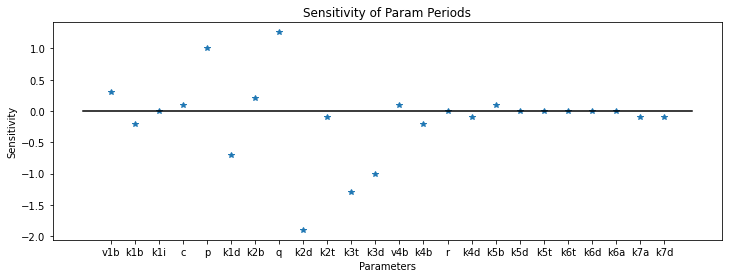

In [130]:
#Finds the period sensitivities for the third parameter set.

per = bw_period(params)
print("period", per)

#Sensitivity of the period.
Srel_per = sensitivity(bw_period, np.array(params), 0.05)
plt.figure(figsize=(12,4))
plt.plot(np.arange(len(params)), Srel_per, '*')
plt.plot(plt.xlim(), [0, 0], 'k');
plt.xticks(ticks=np.arange(len(param_names)), labels=param_names);
plt.xlabel("Parameters")
plt.ylabel("Sensitivity")
plt.title("Sensitivity of Param Periods");

*Extension Figure 15: Sensitivity of Period for Each Parameter*

In this graph, p, q, k3t, and k3d are particularly sensitive to period changes.

In [131]:
#Finds the ranks for period sensitivities.

per_ab = np.absolute(Srel_per)
per_index = []

#Finds the raw rank.
for i in range(len(per_ab)):
    
    li = [param_names[i], per_ab[i]]
    per_index.append(li)
    
per_index.sort(key = lambda x: x[1]) 
print("Raw Rank:\n\n", per_index)

#Finds the rank based on rank = (NP - raw_rank)/(NP-1).
for j in range(len(per_index)):

    per_index[j][1] = (24 - (j+1))/(24-1)
    
print("\nRank:\n\n", per_index)

Raw Rank:

 [['r', 0.0], ['k5d', 0.0], ['k5t', 0.0], ['k6t', 0.0], ['k6d', 0.0], ['k6a', 0.0], ['k1i', 1.7763568394002505e-14], ['k7a', 0.0999999999999801], ['c', 0.09999999999999787], ['v4b', 0.09999999999999787], ['k5b', 0.09999999999999787], ['k7d', 0.09999999999999787], ['k2t', 0.10000000000001563], ['k4d', 0.10000000000001563], ['k1b', 0.19999999999999574], ['k2b', 0.19999999999999574], ['k4b', 0.19999999999999574], ['v1b', 0.2999999999999936], ['k1d', 0.7000000000000028], ['k3d', 0.9999999999999964], ['p', 1.0000000000000142], ['q', 1.2578947368421112], ['k3t', 1.2999999999999723], ['k2d', 1.8999999999999773]]

Rank:

 [['r', 1.0], ['k5d', 0.9565217391304348], ['k5t', 0.9130434782608695], ['k6t', 0.8695652173913043], ['k6d', 0.8260869565217391], ['k6a', 0.782608695652174], ['k1i', 0.7391304347826086], ['k7a', 0.6956521739130435], ['c', 0.6521739130434783], ['v4b', 0.6086956521739131], ['k5b', 0.5652173913043478], ['k7d', 0.5217391304347826], ['k2t', 0.4782608695652174], ['k4d', 0

total amplitude 0.001739300721245396 



Text(0, 0.5, 'Sensitivity')

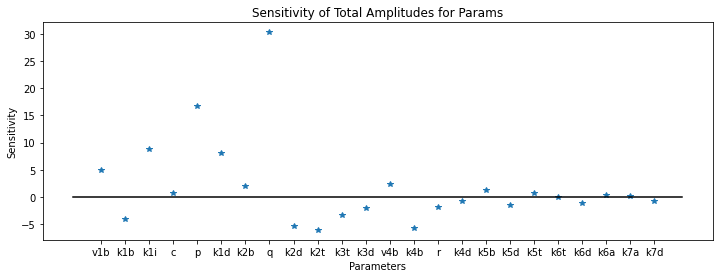

In [132]:
#Sum amplitude of the state variables.
ampTot = goodwin_amplitude(params, which_state = -1 )
print("total amplitude", ampTot, "\n")

#Sensitivity of the amplitude.
Srel_amp = sensitivity(lambda p: bw_amplitude(p, which_state = -1), np.array(params), 0.05)
plt.figure(figsize=(12,4))
plt.plot( np.arange(len(params)), Srel_amp, '*')
plt.plot(plt.xlim(), [0, 0], 'k');
plt.xticks(ticks=np.arange(len(param_names)), labels=param_names);
plt.title("Sensitivity of Total Amplitudes for Params");
plt.xlabel("Parameters")
plt.ylabel("Sensitivity")

*Extension Figure 16: Sensitivity of Total Amplitude for Each Parameter*

In this graph, we notice that k1i, p, k1d, and q are particularly sensitive to amplitude changes. The parameter q has a very high sensitivity, with a sensitivity value of aprroximately 30. Compared to period sensitivities, k1i and k1d are relatively more sensitive but k3t and k3d are less sensitive.

In [133]:
#Finds the ranks for amplitude sensitivities.

amp_ab = np.absolute(Srel_amp)
amp_index = []

#Finds the raw rank.
for i in range(len(amp_ab)):
    
    li = [param_names[i], amp_ab[i]]
    amp_index.append(li)
    
amp_index.sort(key = lambda x: x[1]) 
print("Raw Rank:\n\n", amp_index)

#Finds the rank based on rank = (NP - raw_rank)/(NP-1).
for j in range(len(amp_index)):

    amp_index[j][1] = (24 - (j+1))/(24-1)
    
print("\nRank:\n\n", amp_index)

Raw Rank:

 [['k6t', 0.008703603123585424], ['k7a', 0.11770224636379112], ['k6a', 0.40080784642228195], ['k5t', 0.6327383035833734], ['c', 0.7625752341236236], ['k7d', 0.7906188202192865], ['k4d', 0.8420222773164809], ['k6d', 1.074239169210287], ['k5b', 1.1748600083715033], ['k5d', 1.482746257874723], ['r', 1.9461043912723852], ['k3d', 1.9881332993499257], ['k2b', 2.0171201736416933], ['v4b', 2.3220224803507605], ['k3t', 3.337541606175094], ['k1b', 4.137538293762653], ['v1b', 4.892955130410712], ['k2d', 5.426841032056942], ['k4b', 5.663080310532003], ['k2t', 6.08366211957911], ['k1d', 8.157158140308596], ['k1i', 8.780155836296402], ['p', 16.69016703912483], ['q', 30.314802431722754]]

Rank:

 [['k6t', 1.0], ['k7a', 0.9565217391304348], ['k6a', 0.9130434782608695], ['k5t', 0.8695652173913043], ['c', 0.8260869565217391], ['k7d', 0.782608695652174], ['k4d', 0.7391304347826086], ['k6d', 0.6956521739130435], ['k5b', 0.6521739130434783], ['k5d', 0.6086956521739131], ['r', 0.5652173913043478]

Text(0, 0.5, 'Rank Amplitude Sensitivity')

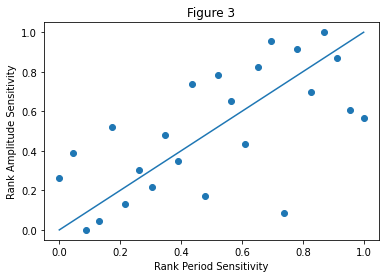

In [134]:
#Sorts the lists by paramaters.
per_index.sort(key = lambda x: x[0])  
amp_index.sort(key = lambda x: x[0]) 

per_ranks = [item[1] for item in per_index]
amp_ranks = [item[1] for item in amp_index]

plt.scatter(per_ranks, amp_ranks)
plt.plot([0, 1], [0, 1])
plt.title("Figure 3")
plt.xlabel("Rank Period Sensitivity")
plt.ylabel("Rank Amplitude Sensitivity")

*Extension Figure 17: Influence of the Parameters on the Periods and Amplitudes*

We applied the sensitivity analysis of Stelling et al (2004) for the mammalian model. In the figure, we see that 12 parameters are biased towards amplitude changes, with 12 parameters being biased towards period changes. We do not see any parameter that is on the diagonal line, meaning that the parameters are evenly biased towards amplitude and period changes. There is 1 parameter that is particularly biased towards period.

Text(0, 0.5, 'Parameter Period Rank')

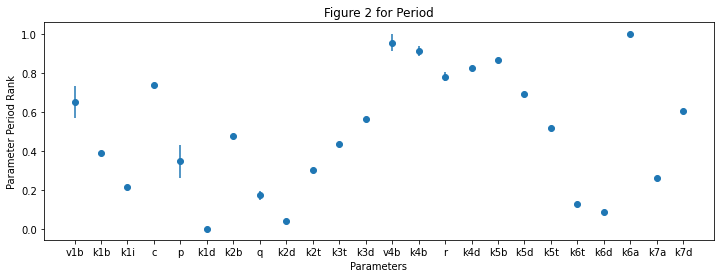

In [153]:
#Recreates a figure similar to Figure 2 for period from Stelling et al (2004) for the third parameter set.

#Calculates +/- 1% error to create error bars on plot.
tmp_params = np.array(params)
for i in range(len(params)):
    tmp_params[i] = (tmp_params[i]*1.01) - tmp_params[i]

plt.figure(figsize=(12,4))
plt.errorbar(np.arange(len(params)), per_ranks, yerr=tmp_params, fmt='o')
plt.xticks(ticks=np.arange(len(param_names)), labels=param_names);
plt.title("Figure 2 for Period");
plt.xlabel("Parameters")
plt.ylabel("Parameter Period Rank")

*Extension Figure 18: Replica of Figure 2 for Period from Stelling et al (2004) for the Mammalian Model*

We see that v1b, p, and v4b have a relatively large standard error with a +/- 1% error rate for period. q, k4b, and r have a very small but noticable standard error as well. k6a has the highest rank, so it is the least sensitive to period changes, while k1d has the lowest rank, so it is the most sensitive to period changes.

Text(0, 0.5, 'Parameter Amplitude Rank')

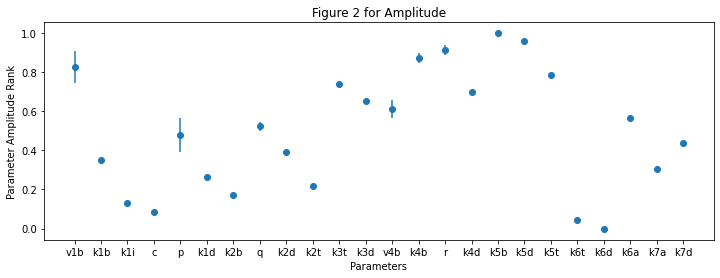

In [155]:
#Recreates a figure similar to Figure 2 for amplitude from Stelling et al (2004) for the third parameter set.

#Calculates +/- 1% error to create error bars on plot.
tmp_params = np.array(params)
for i in range(len(params)):
    tmp_params[i] = (tmp_params[i]*1.01) - tmp_params[i]

plt.figure(figsize=(12,4))
plt.errorbar(np.arange(len(params)), amp_ranks, yerr=tmp_params, fmt='o')
plt.xticks(ticks=np.arange(len(param_names)), labels=param_names);
plt.title("Figure 2 for Amplitude");
plt.xlabel("Parameters")
plt.ylabel("Parameter Amplitude Rank")

*Extension Figure 19: Replica of Figure 2 for Amplitude from Stelling et al (2004) for the Mammalian Model*

We see that v1b, p, and v4b have a relatively large standard error with a +/- 1% error rate for amplitude. q, k4b, and r have a very small but noticable standard error as well. Similar to the period ranks, k5b has the highest rank, so it is the least sensitive to period changes, while k6d has the lowest rank, so it is the most sensitive to period changes.

# Extension 4

Reproduce figures from Becker-Weimann et al (2004). Be sure to include a discussion of your approach and the meaning of the figure.

In [234]:
v1b = 9 # maximal rate of Per2/Cry transcription
k1b = 1 # activation threshold for Per2/Cry transcription
k1i = 0.56 # inhibition constant of Per2/Cry transcription
c   = 0.01 # concentration of constituative activator
p   = 8 # Hill coefficient of inhibition of Per2/Cry transcription
k1d = 0.12 # degradation rate of Per2/Cry mRNA
k2b = 0.3 # complex formation rate of Per2/Cry mRNA
q   = 2 # Number of PER2/CRY complex forming subunits
k2d = 0.05 # degradation rate of cytoplasmic PER2/CRY
k2t = 0.24 # nuclear import rate of teh PER2/CRY complex
k3t = 0.02 # nuclear export rate of teh PER2/CRY complex
k3d = 0.12 # degradation rate of nuclear PER2/CRY
v4b = 3.6 # maximal rate of Bmal1 transcription
k4b = 2.16 # activation threshold for Bmal1 transcription
r   = 3 # Hill coefficient of activation of Bmal1 transcription
k4d = 0.75 # degradation rate of Bmal1 mRNA
k5b = 0.24 # translation rate of BMAL1
k5d = 0.06 # degradation rate of cytoplasmic BMAL1
k5t = 0.45 # nuclear import rate of BMAL1
k6t = 0.06 # nuclear export rate of BMAL1
k6d = 0.12 # degradation rate of nuclear BMAL1
k6a = 0.09 # activation rate of nuclear BMAL1
k7a = 0.003 # deactivation rate of nuclear BMAL1
k7d = 0.09 # degradataion rate of nuclear BMAL1

Text(0, 0.5, 'period [h]')

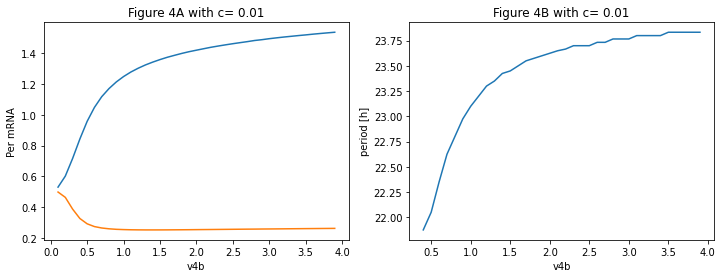

In [247]:
#List of values for v4b.
X_vals = np.arange(0.1, 4, .1)

max_list = []
min_list = []
per_list = []

#Recreates figures 4A and 4B.
for i in range(X_vals.size):
    
    params = (v1b,k1b,k1i,c,p,k1d,k2b,q,k2d,k2t,k3t,k3d,X_vals[i],k4b,r,k4d,k5b,k5d,k5t,k6t,k6d,k6a,k7a,k7d)
    mf = lambda t,y : bw_oscillator(t, y, params)

    sol1 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,200), y0=0.1*np.ones((7,)), 
                                    t_eval=np.arange(0,200,.1))
    sol2 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,100), y0=sol1.y[:,-1], 
                                    t_eval=np.arange(0,100,.1))

    #Finds the troughs and peaks.
    min_list.append(np.amin(sol2.y[0].T))
    max_list.append(np.amax(sol2.y[0].T))
    
    sol = simulate_bw(params)
    per_list.append(get_period(sol.y[0,:], sol.t)[0])

#Plots figure 4A.
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(X_vals, max_list)
plt.plot(X_vals, min_list)
plt.title("Figure 4A with c= 0.01")
plt.xlabel("v4b")
plt.ylabel("Per mRNA")

#Plots figure 4B.
plt.subplot(1, 2, 2)
plt.plot(X_vals[3:], per_list[3:])
plt.title("Figure 4B with c= 0.01")
plt.xlabel("v4b")
plt.ylabel("period [h]")

*Extension Figure 20: Recreation of Figures 4A and 4B.*

To be able to recreate figures 4A and 4B, we first had to make a vector of values for v4b. We used a range of 0.1-4 with a step of 0.1. From here, we called on solve_ivp with the different parameter sets. The values of each parameters were the same for all parameters sets except for v4b. We then computed the troughs and peaks using numpy amin and amax and saved them into two different vectors. From there, we plotted those vectors onto the same subplot as the y-values and the v4b vector as the x-values in order to recreate figure 4A. We were able to plot figure 4B by simulating the mammalian model with each parameter set and saving the periods into a list. We then plotted the period list as the y-values and the v4b as the x-values to recreate figure 4B. When we plotted figure 4B, we left the the first three data points in order to create a plot that starts similarly to how it is in the paper.

Text(0, 0.5, 'period [h]')

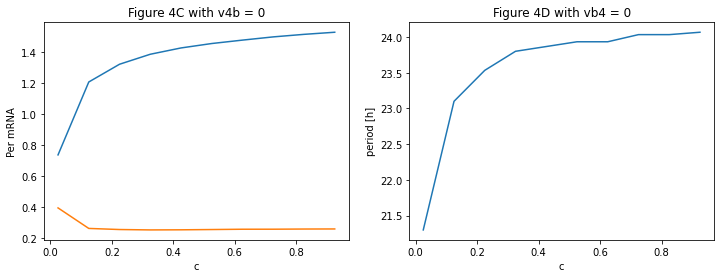

In [255]:
v4b = 0

#List of values for c.
X_vals = np.arange(0.025, 1, .1)

max_list = []
min_list = []
per_list = []

#Recreates figures 4C and 4D.
for i in range(X_vals.size):
    
    params = (v1b,k1b,k1i,X_vals[i],p,k1d,k2b,q,k2d,k2t,k3t,k3d,v4b,k4b,r,k4d,k5b,k5d,k5t,k6t,k6d,k6a,k7a,k7d)
    mf = lambda t,y : bw_oscillator(t, y, params)

    sol1 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,200), y0=0.1*np.ones((7,)), 
                                    t_eval=np.arange(0,200,.1))
    sol2 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,100), y0=sol1.y[:,-1], 
                                    t_eval=np.arange(0,100,.1))

    min_list.append(np.amin(sol2.y[0].T))
    max_list.append(np.amax(sol2.y[0].T))
    
    sol = simulate_bw(params)
    per_list.append(get_period(sol.y[0,:], sol.t)[0])

#Plots figure 4C.
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(X_vals, max_list)
plt.plot(X_vals, min_list)
plt.title("Figure 4C with v4b = 0")
plt.xlabel("c")
plt.ylabel("Per mRNA")

#Plots figure 4D.
plt.subplot(1, 2, 2)
plt.plot(X_vals, per_list)
plt.title("Figure 4D with vb4 = 0")
plt.xlabel("c")
plt.ylabel("period [h]")

*Extension Figure 21: Recreation of Figures 4C and 4D.*

The approach in creating figures 4C and 4D was similar to how we created figures 4A and 4B. The main difference here is that we changed the value of v4b to constantly be 0 while we changed the values of c within the range of 0.025-1 with a step of 0.1.

Text(0, 0.5, 'period [h]')

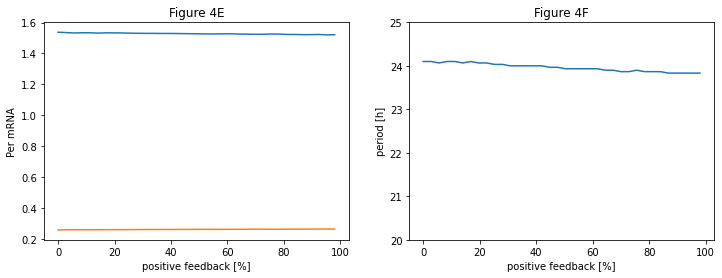

In [273]:
#0% positive feedback corresponds to v4b = 0 and c = 1
#100% corresponds to v4b = 3.6 and c = 0.01
v4b = 0
c = 1

#Lists of values used for positive feedback [%].
v_vals = np.arange(0, 3.6, .1) #36 values
c_vals = np.arange(1, 0.01, -.0275) #We use a step of -.0275 so that there are 36 values.

max_list = []
min_list = []
per_list = []

#Recreates figures 4E and 4F.
for i in range(v_vals.size):
    
    params = (v1b,k1b,k1i,c_vals[i],p,k1d,k2b,q,k2d,k2t,k3t,k3d,v_vals[i],k4b,r,k4d,k5b,k5d,k5t,k6t,k6d,k6a,k7a,k7d)
    mf = lambda t,y : bw_oscillator(t, y, params)

    sol1 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,200), y0=0.1*np.ones((7,)), 
                                    t_eval=np.arange(0,200,.1))
    sol2 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,100), y0=sol1.y[:,-1], 
                                    t_eval=np.arange(0,100,.1))

    min_list.append(np.amin(sol2.y[0].T))
    max_list.append(np.amax(sol2.y[0].T))
    
    sol = simulate_bw(params)
    per_list.append(get_period(sol.y[0,:], sol.t)[0])

#Plots figure 4E.
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(np.arange(0, 100, 2.8), max_list)
plt.plot(np.arange(0, 100, 2.8), min_list)
plt.title("Figure 4E")
plt.xlabel("positive feedback [%]")
plt.ylabel("Per mRNA")

#Plots figure 4F.
plt.subplot(1, 2, 2)
plt.plot(np.arange(0, 100, 2.8), per_list)
plt.yticks(np.arange(20,26,step=1))
plt.title("Figure 4F")
plt.xlabel("positive feedback [%]")
plt.ylabel("period [h]")

*Extension Figure 22: Recreation of Figures 4E and 4F.*

To create figures 4E and 4F, we took a similar approach as before but we are now changing the values of the parameters v4b and c. The Becker-Weimann et al (2004) paper states that 0% positive feedback corresponds to v4b = 0 and c = 1, while 100% corresponds to v4b = 3.6 and c = 0.01. To be able to recreate the figures, we had to make v4b have a range of 0-3.6 with a step of .1 and c have a range of 1-0.01 with a step of -0.0275. We chose these steps so that there would be a total of 36 different parameter sets. The rest of the process is practically the same, with the exception of us making the x-values be np.arange(0, 100, 2.8) so that we could have a proper x-axis that represents positive feedback [%]. We used the yticks feature for Figure 4F because to make the scale larger and more legible to match academic paper.

Figure 4A shows the positive feedback of a certain strength (in this case, bifurcation point is v_4b = 0.35) is necessary for oscillations in the case of low activator concentration (which is c = 0.01). Figure 4C shows that positive feedback can be replaced by a constantly expressed activator (in this case, bifurcation point is c = 0.02) to generate oscillations. c and v_4b can be switched with the right values of c and v_4b, and the same pattern of oscillations can be achieved. In Figure 4C, you need c = 0.02 to begin oscillations and in 4a, you need v_4b = 0.35 to begin oscillations with similar maximums and minimums. Figure 4B and 4D demonstrates that a low maximal transcription rate of Bmal1 (v_4b) and constant low expression of activator (c) should decrease the period. Low transcription rate of v_4b and constant c decreases the rate of the period. In the beginning of A and C before it has reached the Hopf Bifurcation point, there is no oscillation, but as soon as you add in some, oscillation begins and once you reach 1, more power does not change the period and amplitude much. Figure 4E demonstrates how v_4b and c are needed to create positive feedback and varying the positive feedback that is being created does not change the dynamics of negative feedback. Figure 4F shows that varying the positive feedback strength only slightly changed the period of the oscillations. Overall, Figure 4 helps show that with and without positive feedback, the period, phase, and amplitudes of the oscillations are robust in response to varying single parameters.

<hr style="border:2px solid gray"> </hr>

Acknowledgements

*Thanks to help from Stephanie via email.*